In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial = "data/clinicaltrial_data.csv"

In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data using pandas
mouse_d = pd.read_csv(mouse_drug_data)
clinical_d = pd.read_csv(clinical_trial)
mouse_d.head()
clinical_d.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
trial_data_complete_df = pd.merge(mouse_d, clinical_d, how="left", on=["Mouse ID"])
trial_data_complete_df.head()


# Display the data table for preview

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_vol_grouped = trial_data_complete_df.groupby(["Drug","Timepoint"]).mean()
tumor_vol_grouped.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [7]:
# Convert to DataFrame
# Extract only columns "Drug", "Timepoint" and "Tumor Volume (mm3)"
tumor_vol_df = trial_data_complete_df.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]


# Preview DataFrame
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se_response = tumor_vol_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tumor_response_error_df = tumor_se_response.to_frame()
# Preview DataFrame
tumor_response_error_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [9]:
# Minor Data Munging to Re-Format the Data Frames
tumor_res_reformat = tumor_vol_grouped.unstack(0)
tumor_res_reformat_df = tumor_res_reformat ["Tumor Volume (mm3)"]
tumor_res_reformat_df.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


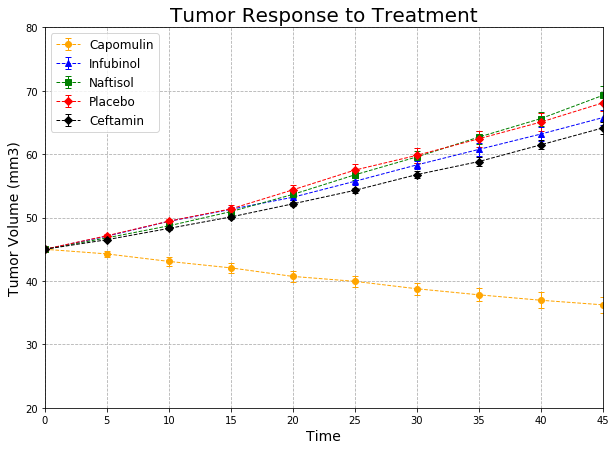

In [10]:
# Generate the Plot with mean values (with Error Bars)
#Set the x axis values in increments of 5
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize = (10,7))


error = tumor_response_error_df["Tumor Volume (mm3)"]["Capomulin"]
capomulin = plt.errorbar(x_axis, tumor_res_reformat_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="Orange")

error = tumor_response_error_df["Tumor Volume (mm3)"]["Infubinol"]
infubinol = plt.errorbar(x_axis, tumor_res_reformat_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

error = tumor_response_error_df["Tumor Volume (mm3)"]["Naftisol"]
Naftisol = plt.errorbar(x_axis, tumor_res_reformat_df["Naftisol"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

error = tumor_response_error_df["Tumor Volume (mm3)"]["Placebo"]
Placebo = plt.errorbar(x_axis, tumor_res_reformat_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "red")

error = tumor_response_error_df["Tumor Volume (mm3)"]["Ceftamin"]
Ceftamin = plt.errorbar(x_axis, tumor_res_reformat_df["Ceftamin"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")


#Set the limits for x and y axis

plt.ylim(20, 80)
plt.xlim(0, 45)

#Set the titles
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

# Plot the Figure
plt.grid(linestyle="dashed")
plt.legend((capomulin, infubinol, Naftisol, Placebo, Ceftamin), ("Capomulin", "Infubinol", "Naftisol", "Placebo", "Ceftamin"), fontsize=12)
plt.show()





![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
# Convert to DataFrame
metastatic_response = trial_data_complete_df.groupby(["Drug", "Timepoint"])
metastatic_df = metastatic_response["Metastatic Sites"].mean().to_frame()

# Preview DataFrame
metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
metastatic_response_error = trial_data_complete_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
meta_res_err_df = metastatic_response_error.to_frame()
# Preview DataFrame
meta_res_err_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames
meta_df = meta_res_err_df.reset_index().pivot(index = 'Timepoint', columns='Drug', values='Metastatic Sites')
#Preview that reformatting worked
meta_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


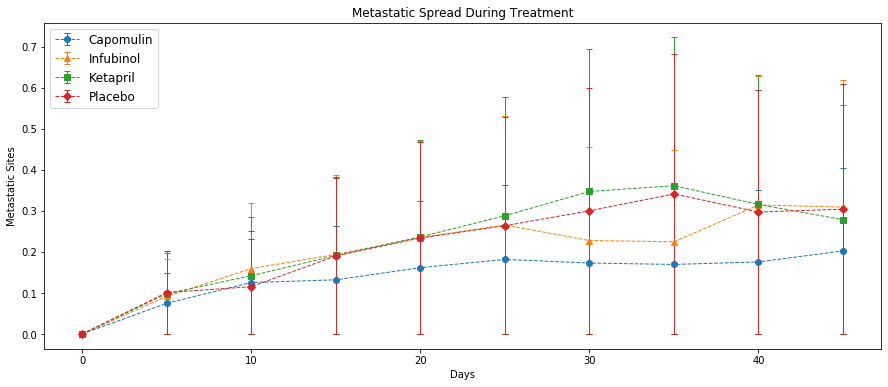

In [14]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(15,6))

error2 = meta_res_err_df["Metastatic Sites"]["Capomulin"]
Capomulin = plt.errorbar(x_axis, meta_df["Capomulin"], yerr=error2, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = meta_res_err_df["Metastatic Sites"]["Infubinol"]
Infubinol = plt.errorbar(x_axis, meta_df["Infubinol"], yerr=error2, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = meta_res_err_df["Metastatic Sites"]["Ketapril"]
Ketapril = plt.errorbar(x_axis, meta_df["Ketapril"], yerr=error2, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = meta_res_err_df["Metastatic Sites"]["Placebo"]
Placebo = plt.errorbar(x_axis, meta_df["Placebo"], yerr=error2, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Days")
plt.ylabel("Metastatic Sites")
plt.legend((Capomulin, Infubinol, Ketapril, Placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_df = trial_data_complete_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mice_df = grouped_df [["Mouse ID"]].count().rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
mice_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [16]:
# Minor Data Munging to Re-Format the Data Frames
micecount_df = mice_df.reset_index().pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
micecount_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


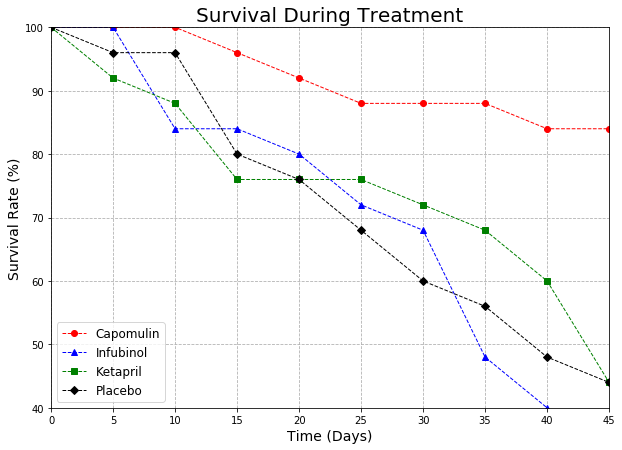

In [17]:
# Generate the Plot (Accounting for percentages)

plt.figure(figsize=(10,7))

cap3 = plt.errorbar(x_axis, (micecount_df["Capomulin"]/25*100), fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "red")
infu3 = plt.errorbar(x_axis, (micecount_df["Infubinol"]/25*100), fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "blue")
keta3 = plt.errorbar(x_axis, (micecount_df["Ketapril"]/25*100),  fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")
plac3 = plt.errorbar(x_axis, (micecount_df["Placebo"]/25*100),  fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="black")

plt.ylim(40, 100)
plt.xlim(0, 45)

# Save the Figure
plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)



# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [18]:
#Calculate the percent changes for each drug
cap_change = ((tumor_res_reformat_df["Capomulin"][45] - tumor_res_reformat_df["Capomulin"][0])/45)*100
ceft_change = ((tumor_res_reformat_df["Ceftamin"][45] - tumor_res_reformat_df["Ceftamin"][0])/45)*100
infu_change = ((tumor_res_reformat_df["Infubinol"][45] - tumor_res_reformat_df["Infubinol"][0])/45)*100
keta_change = ((tumor_res_reformat_df["Ketapril"][45] - tumor_res_reformat_df["Ketapril"][0])/45)*100
naft_change = ((tumor_res_reformat_df["Naftisol"][45] - tumor_res_reformat_df["Naftisol"][0])/45)*100
plac_change = ((tumor_res_reformat_df["Placebo"][45] - tumor_res_reformat_df["Placebo"][0])/45)*100
prop_change = ((tumor_res_reformat_df["Propriva"][45] - tumor_res_reformat_df["Propriva"][0])/45)*100
rami_change = ((tumor_res_reformat_df["Ramicane"][45] - tumor_res_reformat_df["Ramicane"][0])/45)*100
stel_change = ((tumor_res_reformat_df["Stelasyn"][45] - tumor_res_reformat_df["Stelasyn"][0])/45)*100
zoni_change = ((tumor_res_reformat_df["Zoniferol"][45] - tumor_res_reformat_df["Zoniferol"][0])/45)*100

drug_change_df = pd.DataFrame({"Drug": ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],
                               "Percent Change": [cap_change, ceft_change, infu_change, keta_change, naft_change, plac_change, prop_change, rami_change, stel_change, zoni_change]
                              })
drug_change_df.head()
# Display the data to confirm
drug_change_df


,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


![Metastatic Spread During Treatment](../Images/change.png)

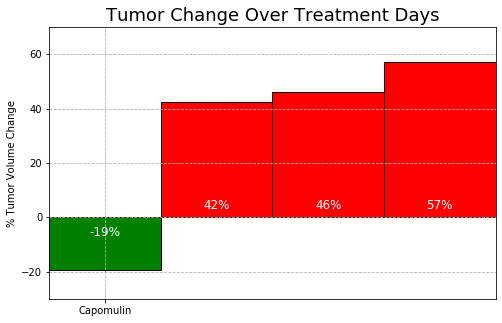

In [21]:
plt.figure(figsize=(8,5))
# Store all Relevant Percent Changes into a Tuple
rects1 = plt.bar(0, drug_change_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, drug_change_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)

# Splice the data between passing and failing drugs

tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drug_change_df["Drug"])

plt.xlim(0, 4)
plt.ylim(-30, 70)

plt.title("Tumor Change Over Treatment Days", fontsize=18)
plt.ylabel("% Tumor Volume Change")


# Use functions to label the percentages of changes


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=12)

autolabel(rects1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=12)

# Call functions to implement the function calls
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Show the Figure
#fig.show()
plt.show()
